In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
image_height = 227
image_weight = 227
batch_size = 20
path ='/kaggle/input/sea-animals-image-dataste'

In [4]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    batch_size = batch_size,
    image_size =(image_height,image_weight),

    shuffle = True,
    seed =123,
    validation_split =0.3,
    subset ='training'
    
    )

Found 13711 files belonging to 23 classes.
Using 9598 files for training.


In [5]:
validation_data =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    batch_size = batch_size,
    image_size =(image_height,image_weight),

    shuffle = True,
    seed =123,
    validation_split =0.3,
    subset ='validation'
    
    )

Found 13711 files belonging to 23 classes.
Using 4113 files for validation.


In [6]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(227,227,3),
                   pooling='avg',classes=23,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(23, activation='softmax'))

94765736/94765736 [==============================] - 3s 0us/step


In [7]:
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 23)               11799     
 pper)                                                           
                                                                 
Total params: 24,648,599
Trainable params: 1,060,887
Non-trainable params: 23,587,712
____________________________________

In [8]:
resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])


In [9]:
epochs=10
history = resnet_model.fit(
    
  training_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
480/480 [==============================] - 1464s 3s/step - loss: 1.3775 - accuracy: 0.6008 - val_loss: 1.0038 - val_accuracy: 0.7005
Epoch 2/10
480/480 [==============================] - 1443s 3s/step - loss: 0.8555 - accuracy: 0.7469 - val_loss: 0.8769 - val_accuracy: 0.7389
Epoch 3/10
480/480 [==============================] - 1427s 3s/step - loss: 0.7173 - accuracy: 0.7871 - val_loss: 0.8353 - val_accuracy: 0.7510
Epoch 4/10
480/480 [==============================] - 1431s 3s/step - loss: 0.6285 - accuracy: 0.8195 - val_loss: 0.8138 - val_accuracy: 0.7571
Epoch 5/10
480/480 [==============================] - 1432s 3s/step - loss: 0.5586 - accuracy: 0.8357 - val_loss: 0.8026 - val_accuracy: 0.7576
Epoch 6/10
480/480 [==============================] - 1447s 3s/step - loss: 0.5109 - accuracy: 0.8518 - val_loss: 0.7952 - val_accuracy: 0.7666
Epoch 7/10
480/480 [==============================] - 1425s 3s/step - loss: 0.4612 - accuracy: 0.8671 - val_loss: 0.7769 - val_accuracy:

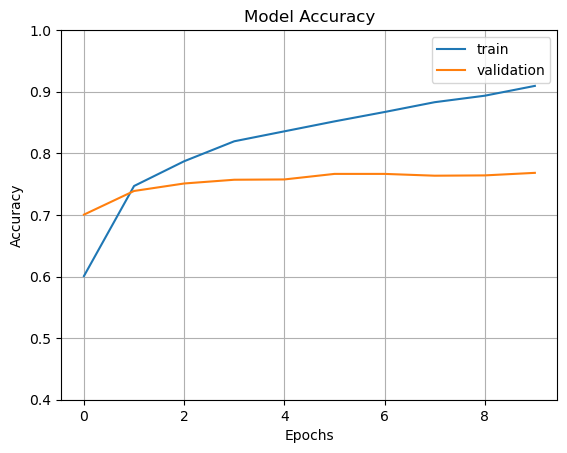

In [10]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     